In [1]:
#Importing Some Necessory Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read Data Using Pandas
df = pd.read_csv("C:\\Project data/avocado.csv")

In [3]:
#This Is Our Data
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


1.In Our DataSet We Have 14 Columns And 18249 Rows

2.Unnamed 0 Is unWanted Column So I am Deleteing It

In [4]:
#Checking Null Value And Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


1.There Is No Null Values In Any Column In Our Data.

2.All Things Are Goods Only Date Column dtype In Object  We Split Date Column In Change Dtpye.

In [5]:
#Deleting The Unwanted  Column
df.drop(["Unnamed: 0"],axis = 1,inplace = True)

Droping "Unnamed 0" Column  We Dont Require Any Unwanted Column For Our Model.

In [6]:
print(df['Date'].min())
print(df['Date'].max())

2015-01-04
2018-03-25


According To Dates We Have 3 Financial Year Data Of Hass Avocado

In [7]:
#Spliting  Date Columns Into  Three Parts   Day Month Year
df[['Year','Month','Date']] = df['Date'].str.split("-",expand = True)


In [8]:
# Changing Datatype  OF These 3 Columns
df[["Year","Month","Date"]] =df[['Year',"Month","Date"]].astype(int)

In [9]:
print(df['year'].value_counts())
print(df['Year'].value_counts())

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64
Year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64


When I Splited Date Column  It Splited In Three Columns Day Month And Year But We Already Have a Year Column. So We Check Both year Columns And  Delete One Of Them Bcoz We Dont Need Two Column.

In [10]:
#Droping Year Column
df.drop(['year'],axis = 1,inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  region        18249 non-null  object 
 12  Year          18249 non-null  int32  
 13  Month         18249 non-null  int32  
dtypes: float64(9), int32(3), object(2)
memory usage: 1.7+ MB


In [12]:
# Checking Values
for i in df.columns:
    print(df[i].value_counts())
    

Date
4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: count, dtype: int64
AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64
Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64
4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64
4225
0.00         61
177.87       

In [13]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,15.662612,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,8.776281,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,8.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,16.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,23.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,31.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


All Continuous Columns(Total Volume	4046	4225	4770	Total Bags	Small Bags	Large Bags	XLarge Bags) Have Very Big Difference In  Persentile    Huge Defference  Means Our Data Have huge Skewness 

In [14]:
df.describe(include = "object")

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


In [15]:
#Changing Position  Of Month Column
month_column = df['Month']
df.drop(['Month'],axis = 1,inplace = True)
df.insert(1,"Month",month_column)
df

,Date,Month,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year
0,27,12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015
1,20,12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015
2,13,12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015
3,6,12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015
4,29,11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,2,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018
18245,28,1,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018
18246,21,1,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018
18247,14,1,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018


In [16]:
#Changing Year Column Index No. 
year_col = df['Year']
df.drop("Year",axis = 1, inplace = True)
df.insert(2,"Year",year_col)
df

,Date,Month,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27,12,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,20,12,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,13,12,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,6,12,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,29,11,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,2,2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,28,1,2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,21,1,2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,14,1,2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


<Axes: xlabel='Date', ylabel='Count'>

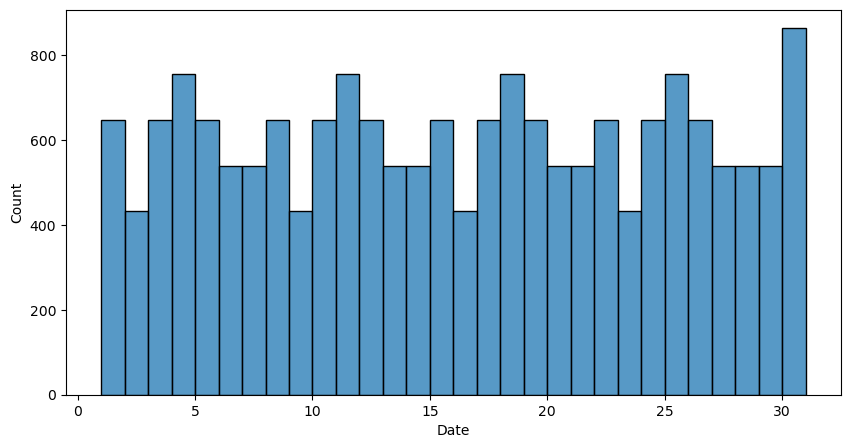

In [17]:
plt.figure(figsize = (10,5))
sns.histplot(df['Date'],bins = 30)

According To This Every Week  Count Almost Same Only Last Date Of Month Is High  

<Axes: xlabel='Month', ylabel='count'>

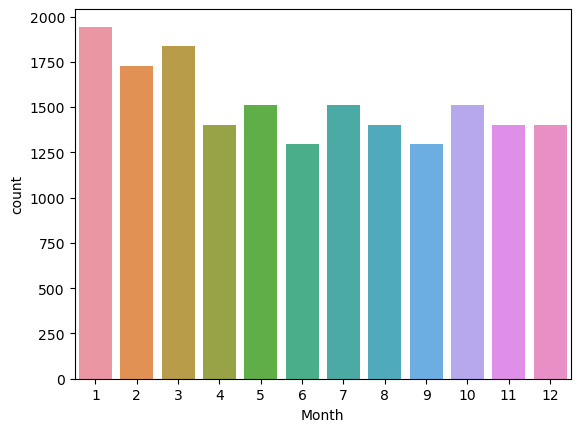

In [18]:
sns.countplot(x="Month",data =df)

1 Month Count Is High  In 3 Years

<Axes: xlabel='Month', ylabel='count'>

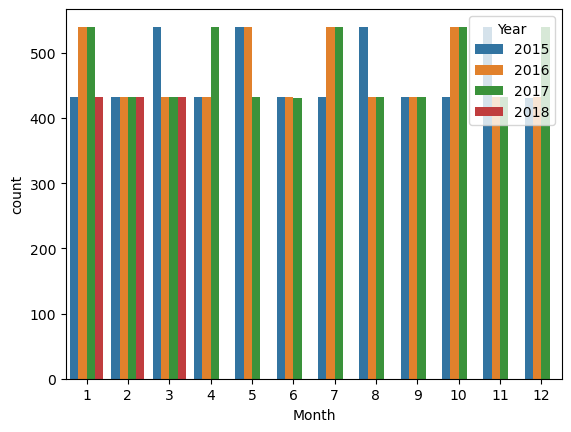

In [19]:
sns.countplot(x = "Month" , data = df ,hue ='Year')

<Axes: xlabel='Year', ylabel='count'>

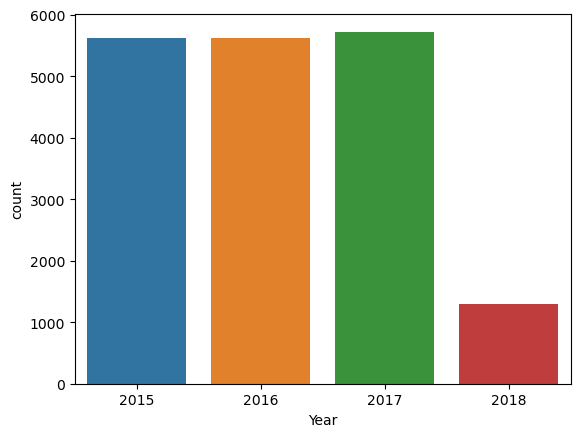

In [20]:
sns.countplot(x ="Year",data = df)

In 2015,2016 and 2017 Count Is  Almost Same But In 2018 Count Will Very Low Bcoz We HAve Only 3 months Data Of 2018

<Axes: xlabel='region', ylabel='count'>

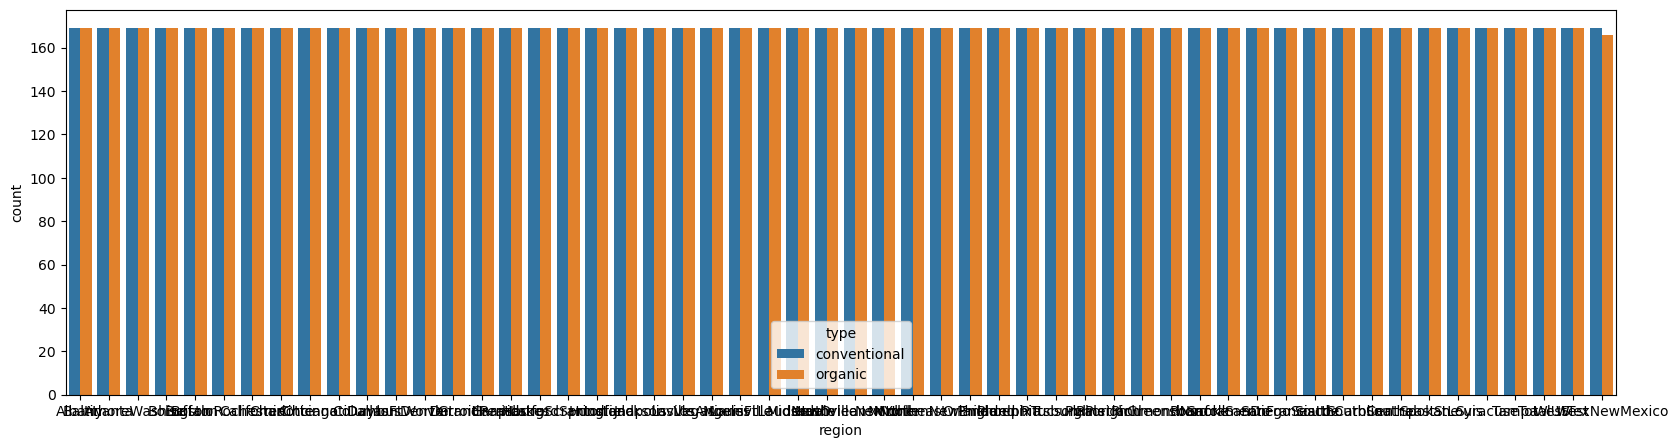

In [21]:
plt.figure(figsize = (20,5))
sns.countplot(x = "region",data =df ,hue = 'type')

In [22]:
yearly_total_vol  = df.groupby(df['Year'])["Total Volume"].sum()

In [23]:
print(yearly_total_vol)

Year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64


in 2015 Volume Sale Some Low  And  2016,2017,  Same Almost Same  2018 Sale Is Low but We Have Only 3 Month Of Data Reason Behind  - Financial Year - 

In [24]:
print(df['Total Volume'].min())
print(df['Total Volume'].max())

84.56
62505646.52


Total Volume Column Have Huge Difference OF Avocado Sale  In One Day 

In [25]:
#Group All Region And Check Total Unit Consuption
region_total_vol =pd.DataFrame( df.groupby(df['region'])["Total Volume"].sum())
region_total_vol

,Total Volume
region,
Albany,1.606780e+07
Atlanta,8.860512e+07
BaltimoreWashington,1.347139e+08
Boise,1.441319e+07
Boston,9.727398e+07
BuffaloRochester,2.296247e+07
California,1.028982e+09
Charlotte,3.555554e+07
Chicago,1.337023e+08


In [26]:
print(region_total_vol.min())
print(region_total_vol.max())

Total Volume    10942667.68
dtype: float64
Total Volume    5.864740e+09
dtype: float64


In [27]:
region_Volume = region_total_vol.sort_values(by = ['Total Volume'])

In [28]:
region_Volume

,Total Volume
region,
Syracuse,1.094267e+07
Boise,1.441319e+07
Spokane,1.556528e+07
Albany,1.606780e+07
Louisville,1.609700e+07
Pittsburgh,1.880635e+07
BuffaloRochester,2.296247e+07
Roanoke,2.504201e+07
Jacksonville,2.879000e+07


Highest  Avocado Units Consumption is happening In TotalUs  And Lowest In Syracusa

In [29]:
#Encoding  Type And Region Column
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])

In [30]:
df

,Date,Month,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27,12,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,20,12,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,13,12,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,6,12,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,29,11,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,2,2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,28,1,2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,21,1,2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,14,1,2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


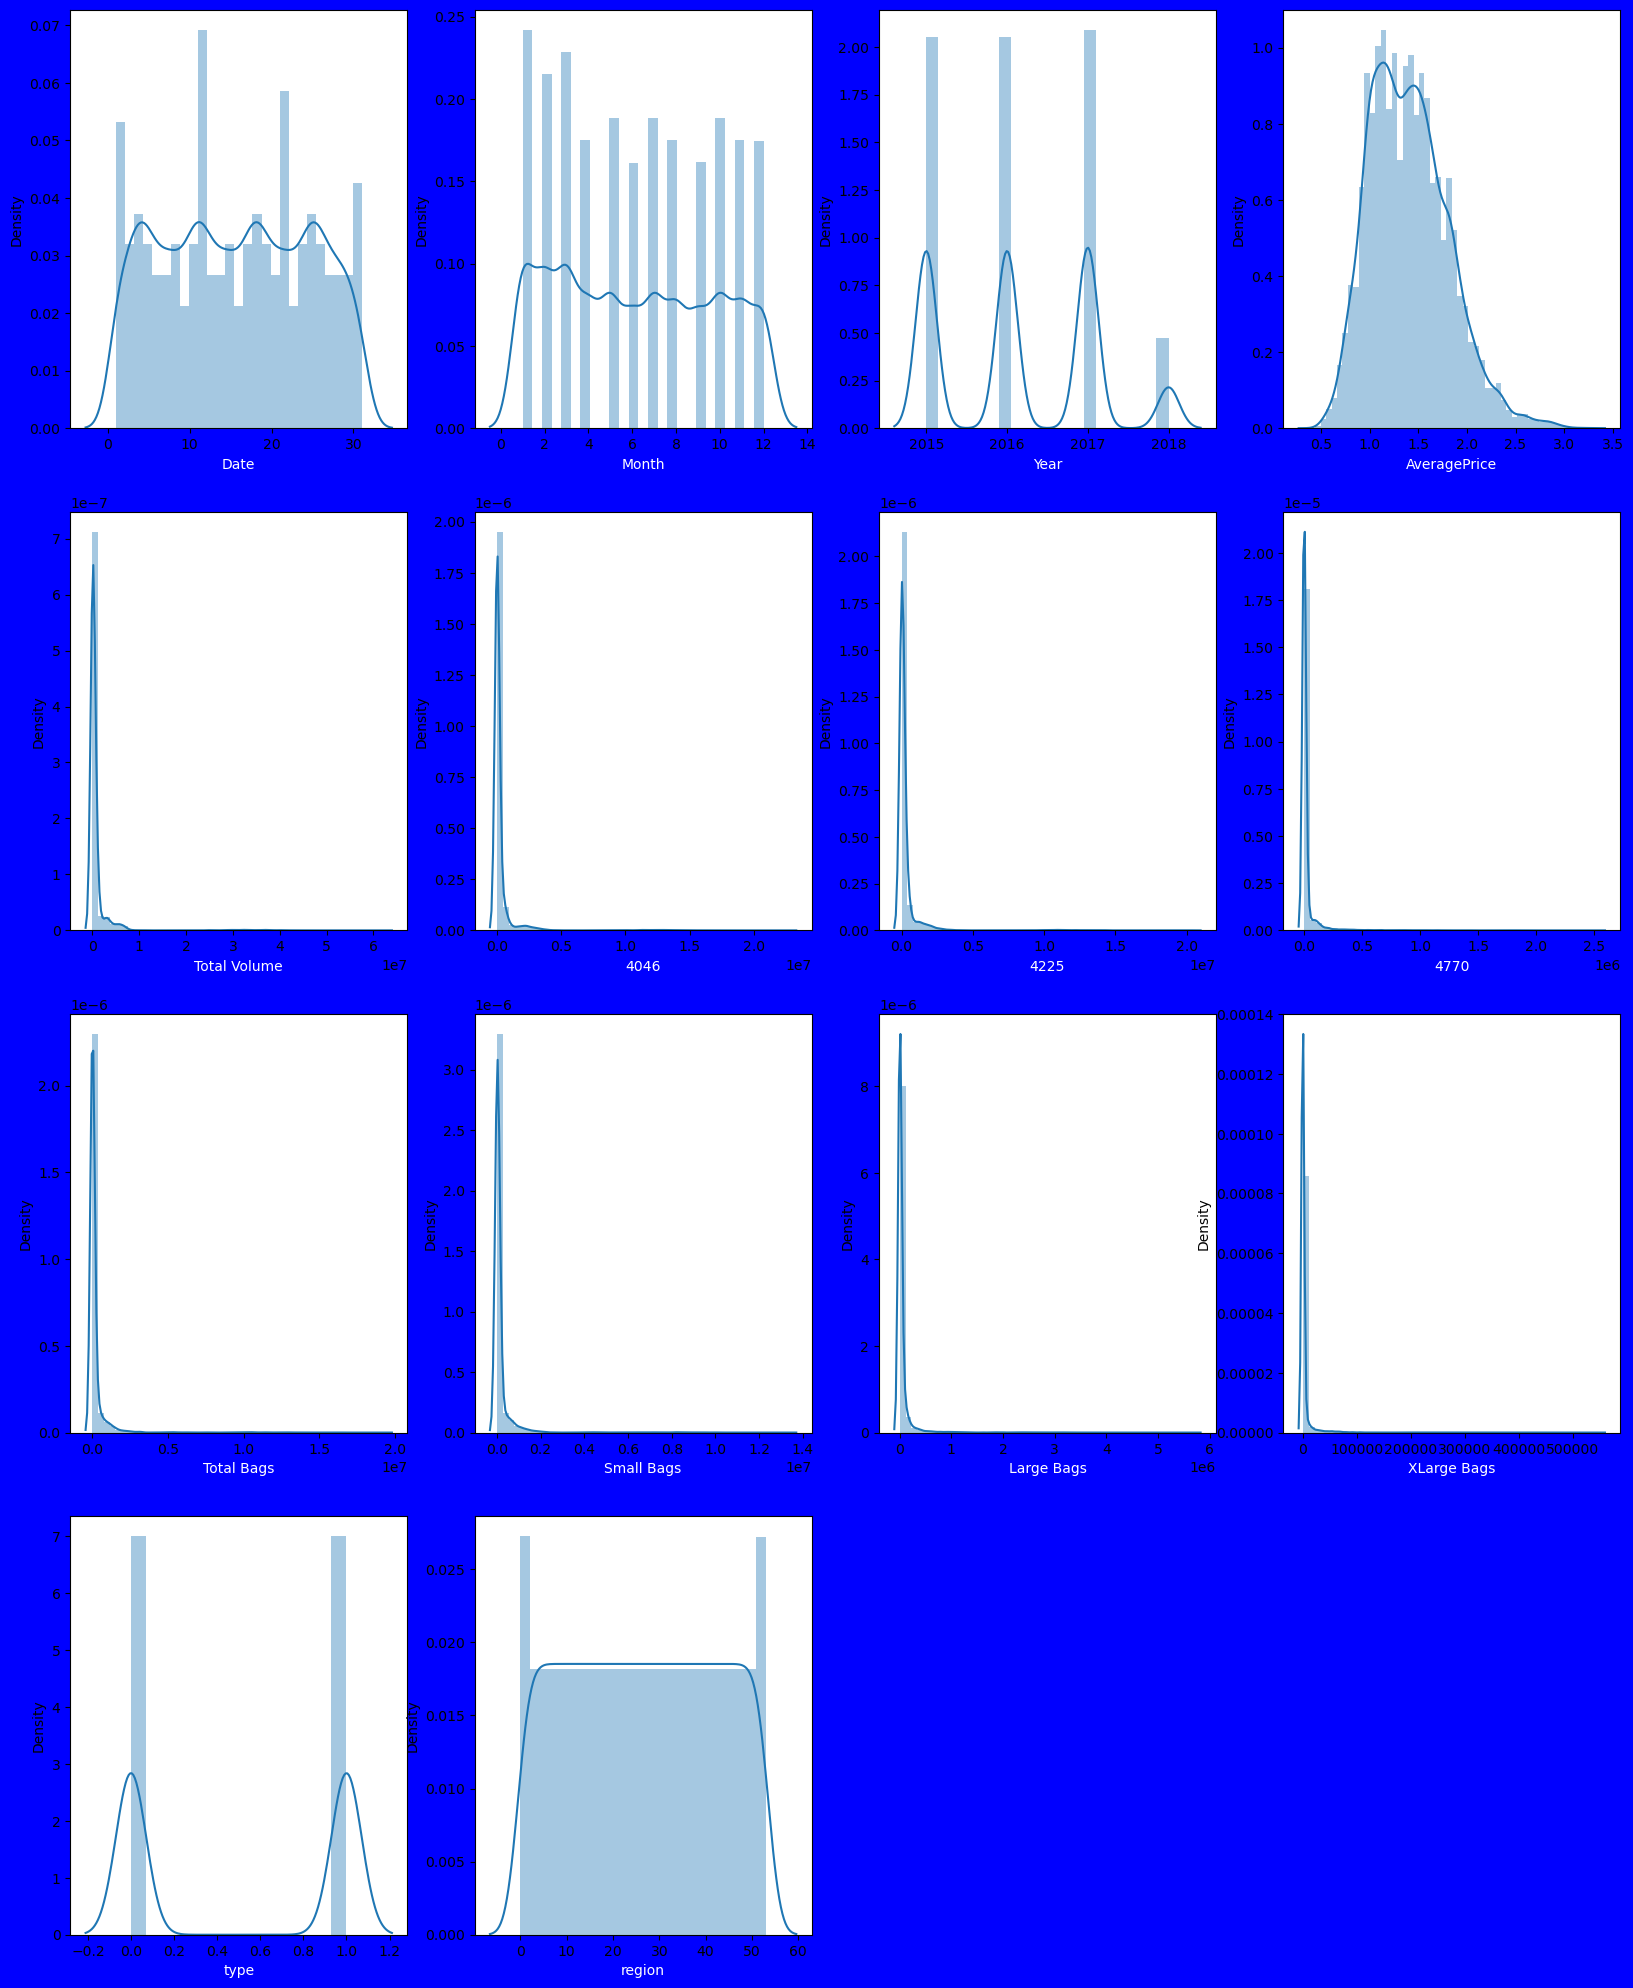

In [31]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

Huge Skewness Is Present  In Our DataSet "Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags" in These Columns.

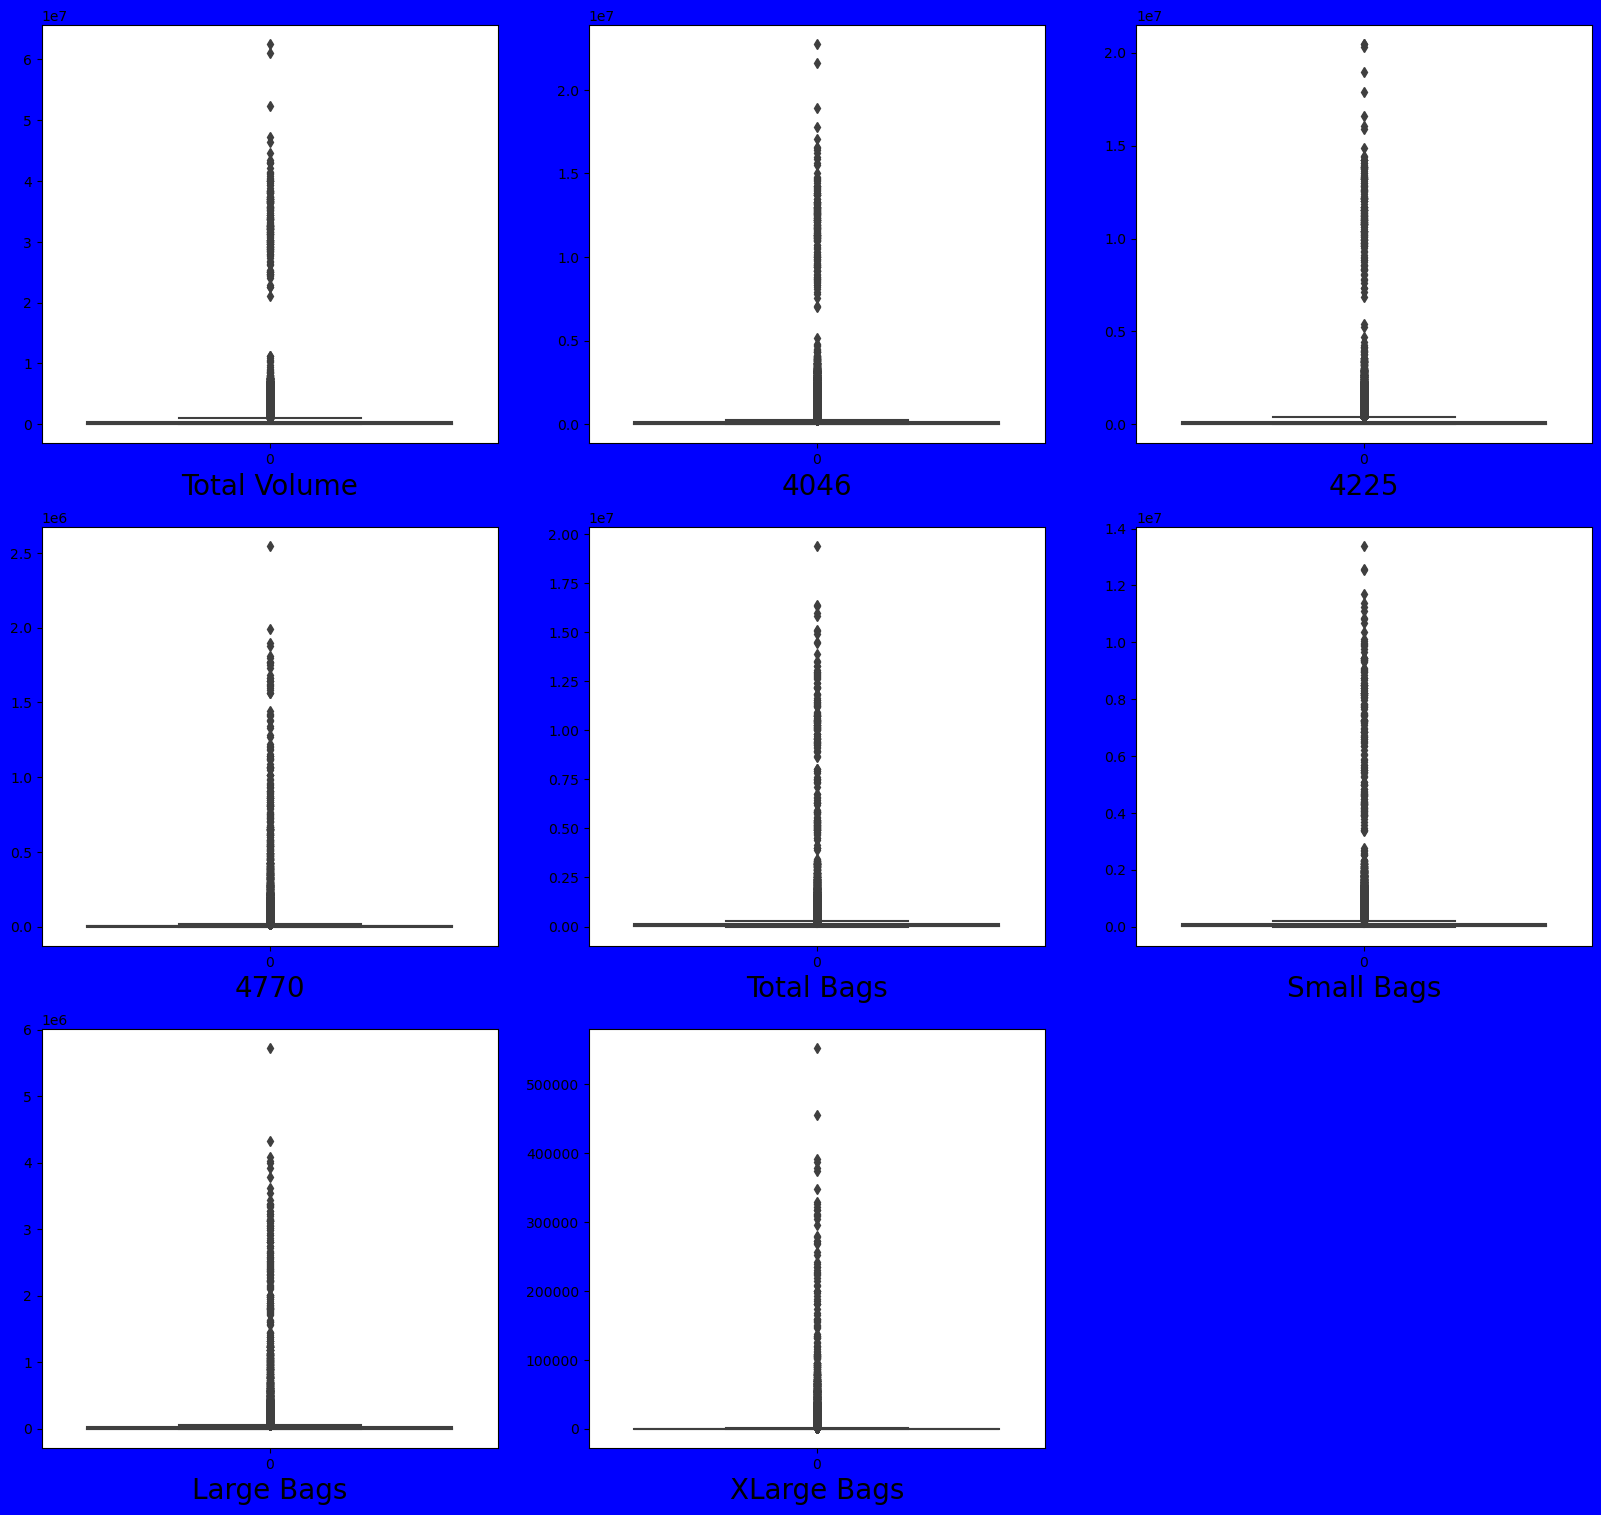

In [32]:
plt.figure(figsize = (20,25),facecolor = "blue")
plotnumber = 1
for column in df[["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]:
    if plotnumber<= len(column):
        axs = plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

Our Data Have Huge Amount Of Outliers  We Will Remove The Skewness  So Outlier Remove

In [33]:
from scipy.stats import zscore
z_score = zscore(df[["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]])
abs_z_score = np.abs(z_score)
filtering = (abs_z_score<3).all(axis = 1)
df =df[filtering]
df.describe()

,Date,Month,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
count,17782.000000,17782.000000,17782.000000,17782.000000,1.778200e+04,1.778200e+04,1.778200e+04,17782.000000,1.778200e+04,1.778200e+04,17782.000000,17782.000000,17782.000000,17782.000000
mean,15.683613,6.194298,2016.141098,1.415546,4.579126e+05,1.535177e+05,1.644240e+05,11078.541716,1.288903e+05,9.990217e+04,27640.732102,1347.377066,0.513047,26.161624
std,8.777845,3.537070,0.939273,0.402278,1.009722e+06,4.381507e+05,3.978660e+05,34373.958145,2.812726e+05,2.288217e+05,72791.402335,5222.289928,0.499844,15.402194
min,1.000000,1.000000,2015.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,2015.000000,1.110000,1.048145e+04,8.043150e+02,2.877773e+03,0.000000,4.846455e+03,2.636443e+03,109.015000,0.000000,0.000000,13.000000
50%,16.000000,6.000000,2016.000000,1.380000,9.796080e+04,7.514895e+03,2.603862e+04,158.285000,3.671581e+04,2.395354e+04,2402.420000,0.000000,1.000000,26.000000
75%,23.000000,9.000000,2017.000000,1.670000,3.852980e+05,9.713905e+04,1.271795e+05,5175.322500,1.012714e+05,7.780317e+04,18809.847500,70.292500,1.000000,39.000000
max,31.000000,12.000000,2018.000000,3.250000,8.362504e+06,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,55940.330000,1.000000,53.000000


We Using Z Stats For Remove Top End And Bottam Outlier 

In [34]:
#Using Boxcox Method  for remove Skewness
from scipy.stats import boxcox
for i in df.columns:
    if df.dtypes[i]=="float" and i !="AveragePrice":
        trnsfrm_data, _ = boxcox(df[i]+1)
        df[i] =trnsfrm_data   

In [35]:
df.describe()

,Date,Month,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
count,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000
mean,15.683613,6.194298,2016.141098,1.415546,11.840256,11.749666,15.783342,4.581227,14.876555,17.042186,10.719980,0.728908,0.513047,26.161624
std,8.777845,3.537070,0.939273,0.402278,2.425725,5.131057,6.078764,3.739911,4.262605,6.295494,6.608931,1.078772,0.499844,15.402194
min,1.000000,1.000000,2015.000000,0.440000,4.545969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,2015.000000,1.110000,9.682913,8.049473,11.388325,0.000000,11.553760,12.106842,5.829678,0.000000,0.000000,13.000000
50%,16.000000,6.000000,2016.000000,1.380000,12.152808,11.446772,16.154367,4.887435,15.468879,17.646803,11.205852,0.000000,1.000000,26.000000
75%,23.000000,9.000000,2017.000000,1.670000,13.692753,15.874024,20.183408,8.039211,17.647314,21.158344,15.701504,2.108623,1.000000,39.000000
max,31.000000,12.000000,2018.000000,3.250000,17.228460,23.539780,30.967417,11.632830,25.929652,34.057116,26.253381,2.584764,1.000000,53.000000


DataSet Looking Good  Values Convert Into Small Number  

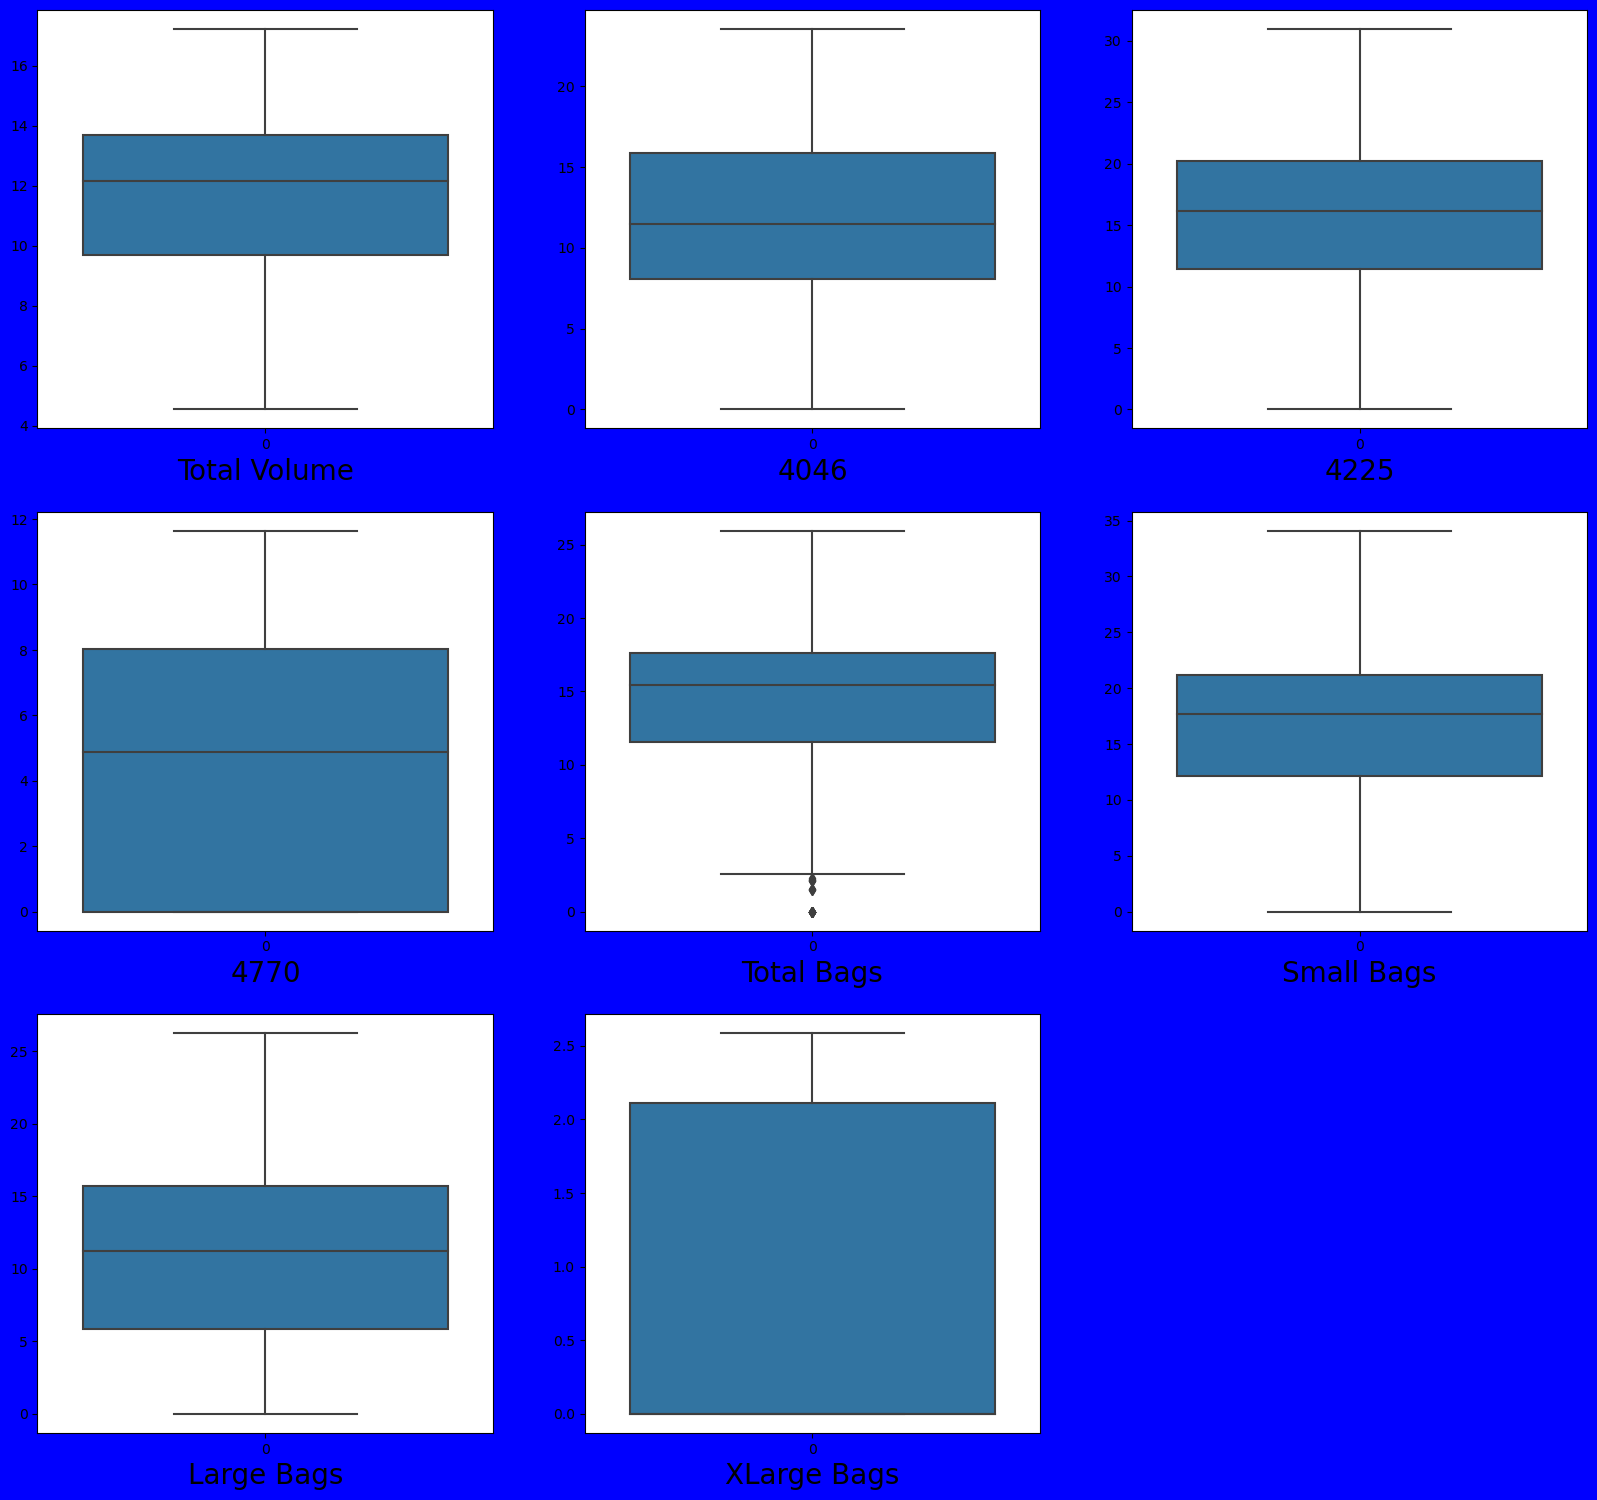

In [36]:
plt.figure(figsize = (20,25),facecolor = "blue")
plotnumber = 1
for column in df[["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]:
    if plotnumber<= len(column):
        axs = plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

Again Using BoxPlot  For Checking Outlier Present Or Not  In TotalBag Columns 2-3 Outlier Present But Is It Not Effect Our Model 

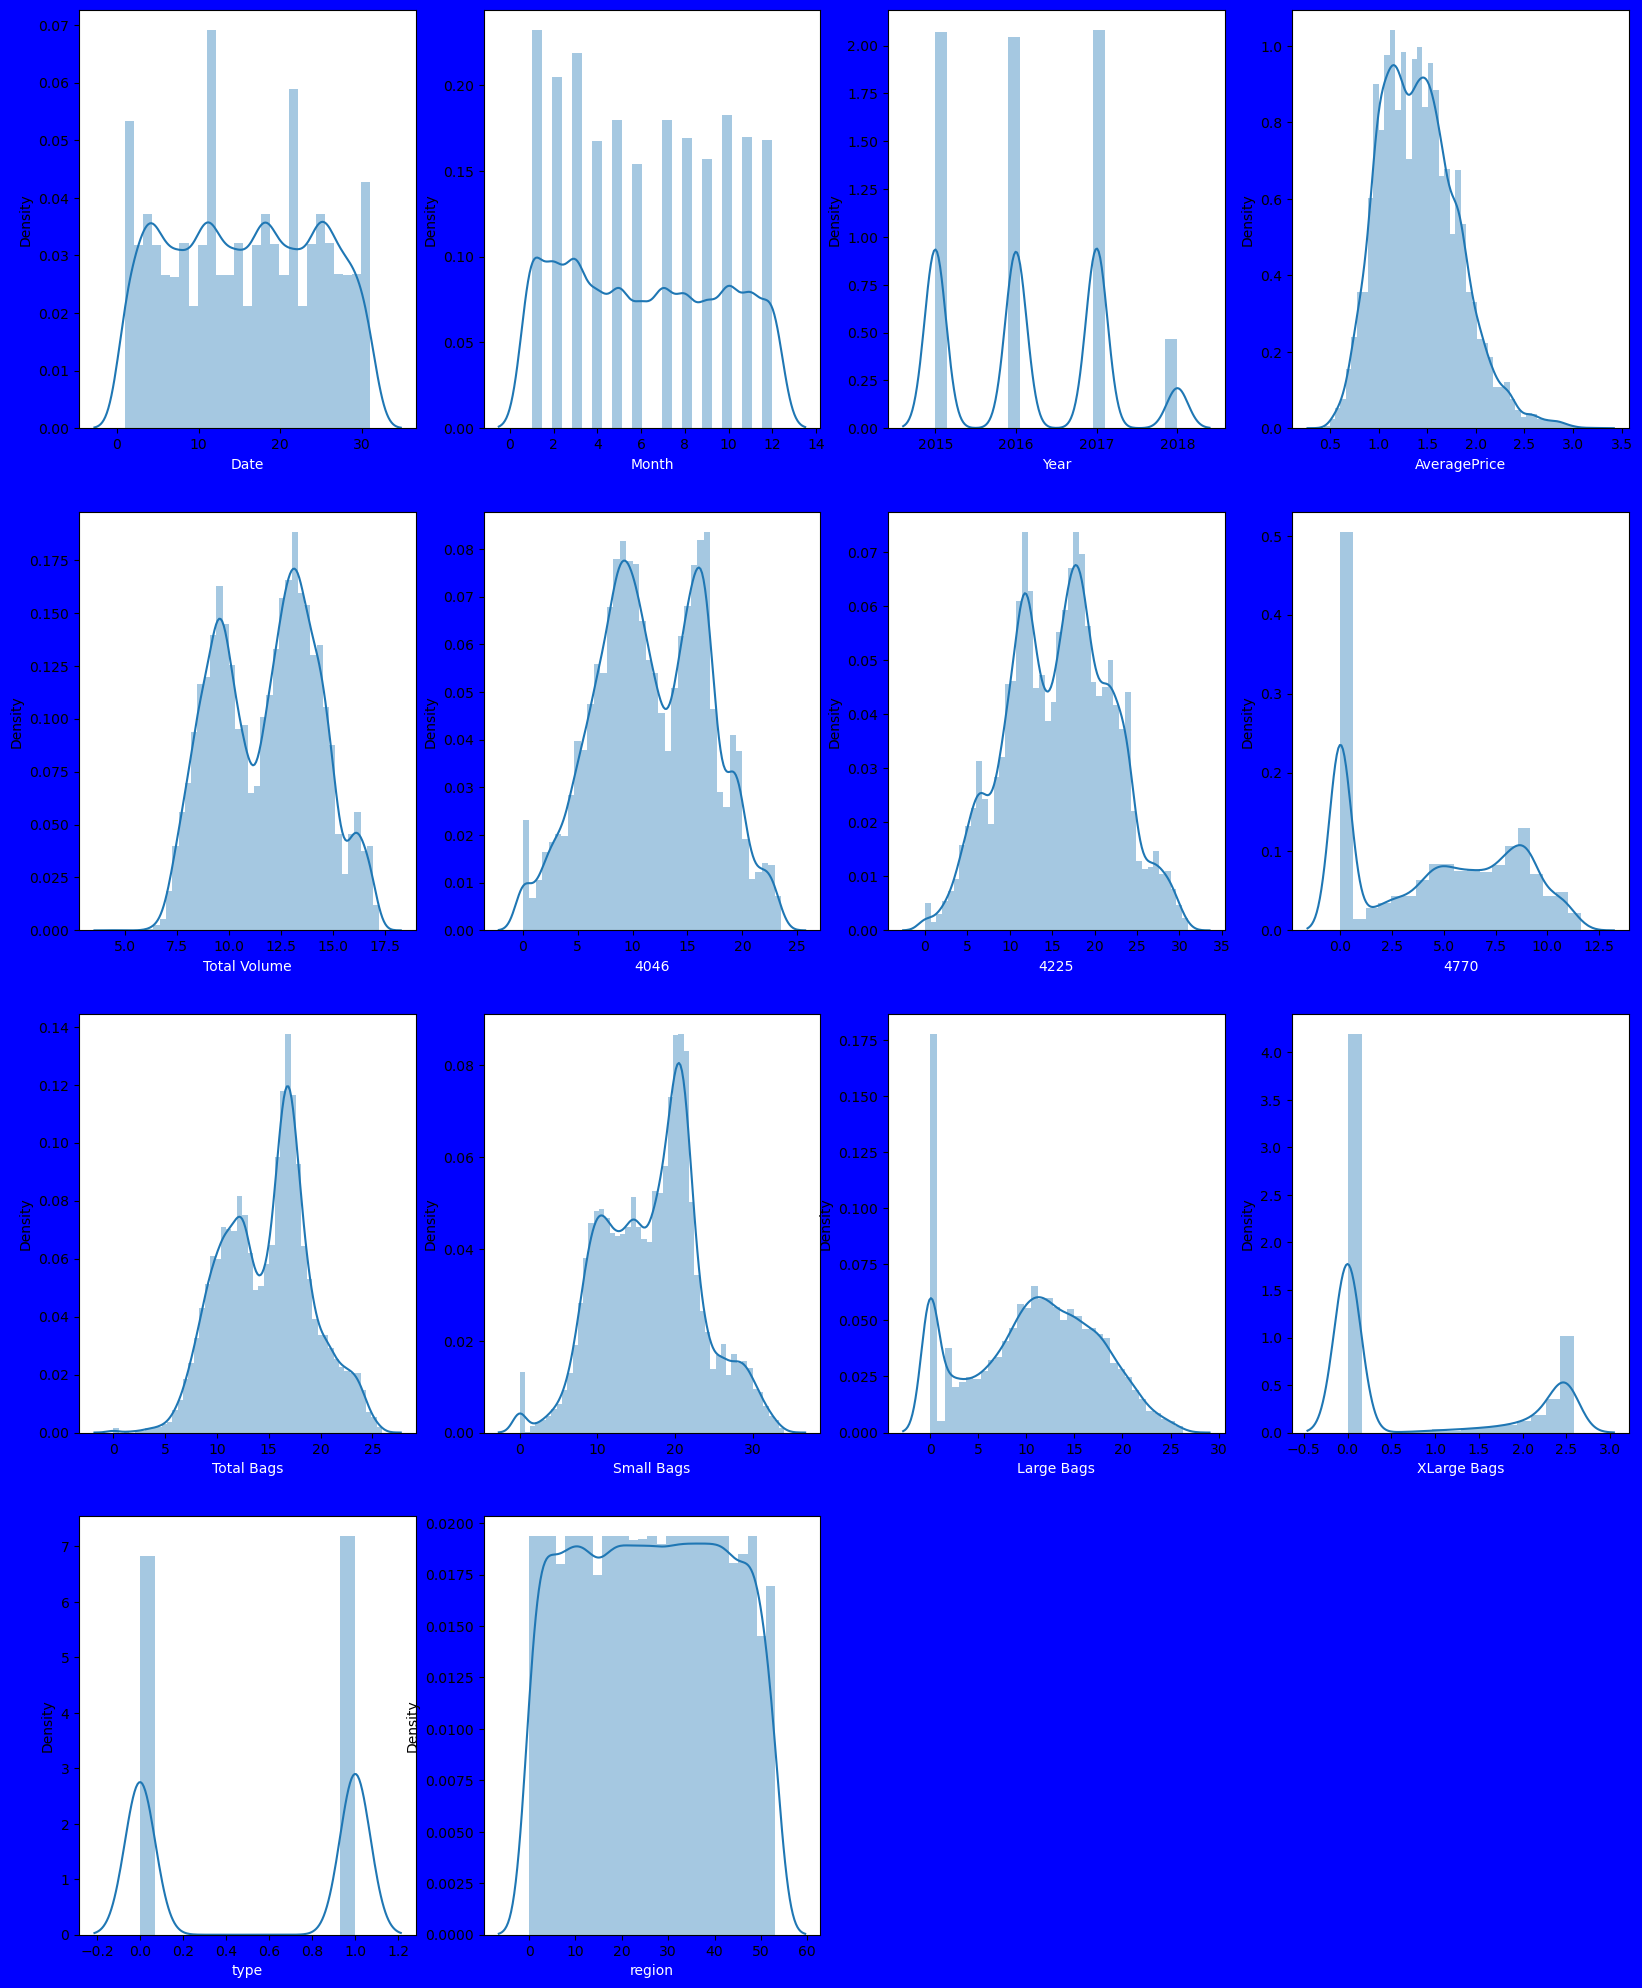

In [37]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

Almost Skewness Is Removed now Our Data Almost Normally Distributed 

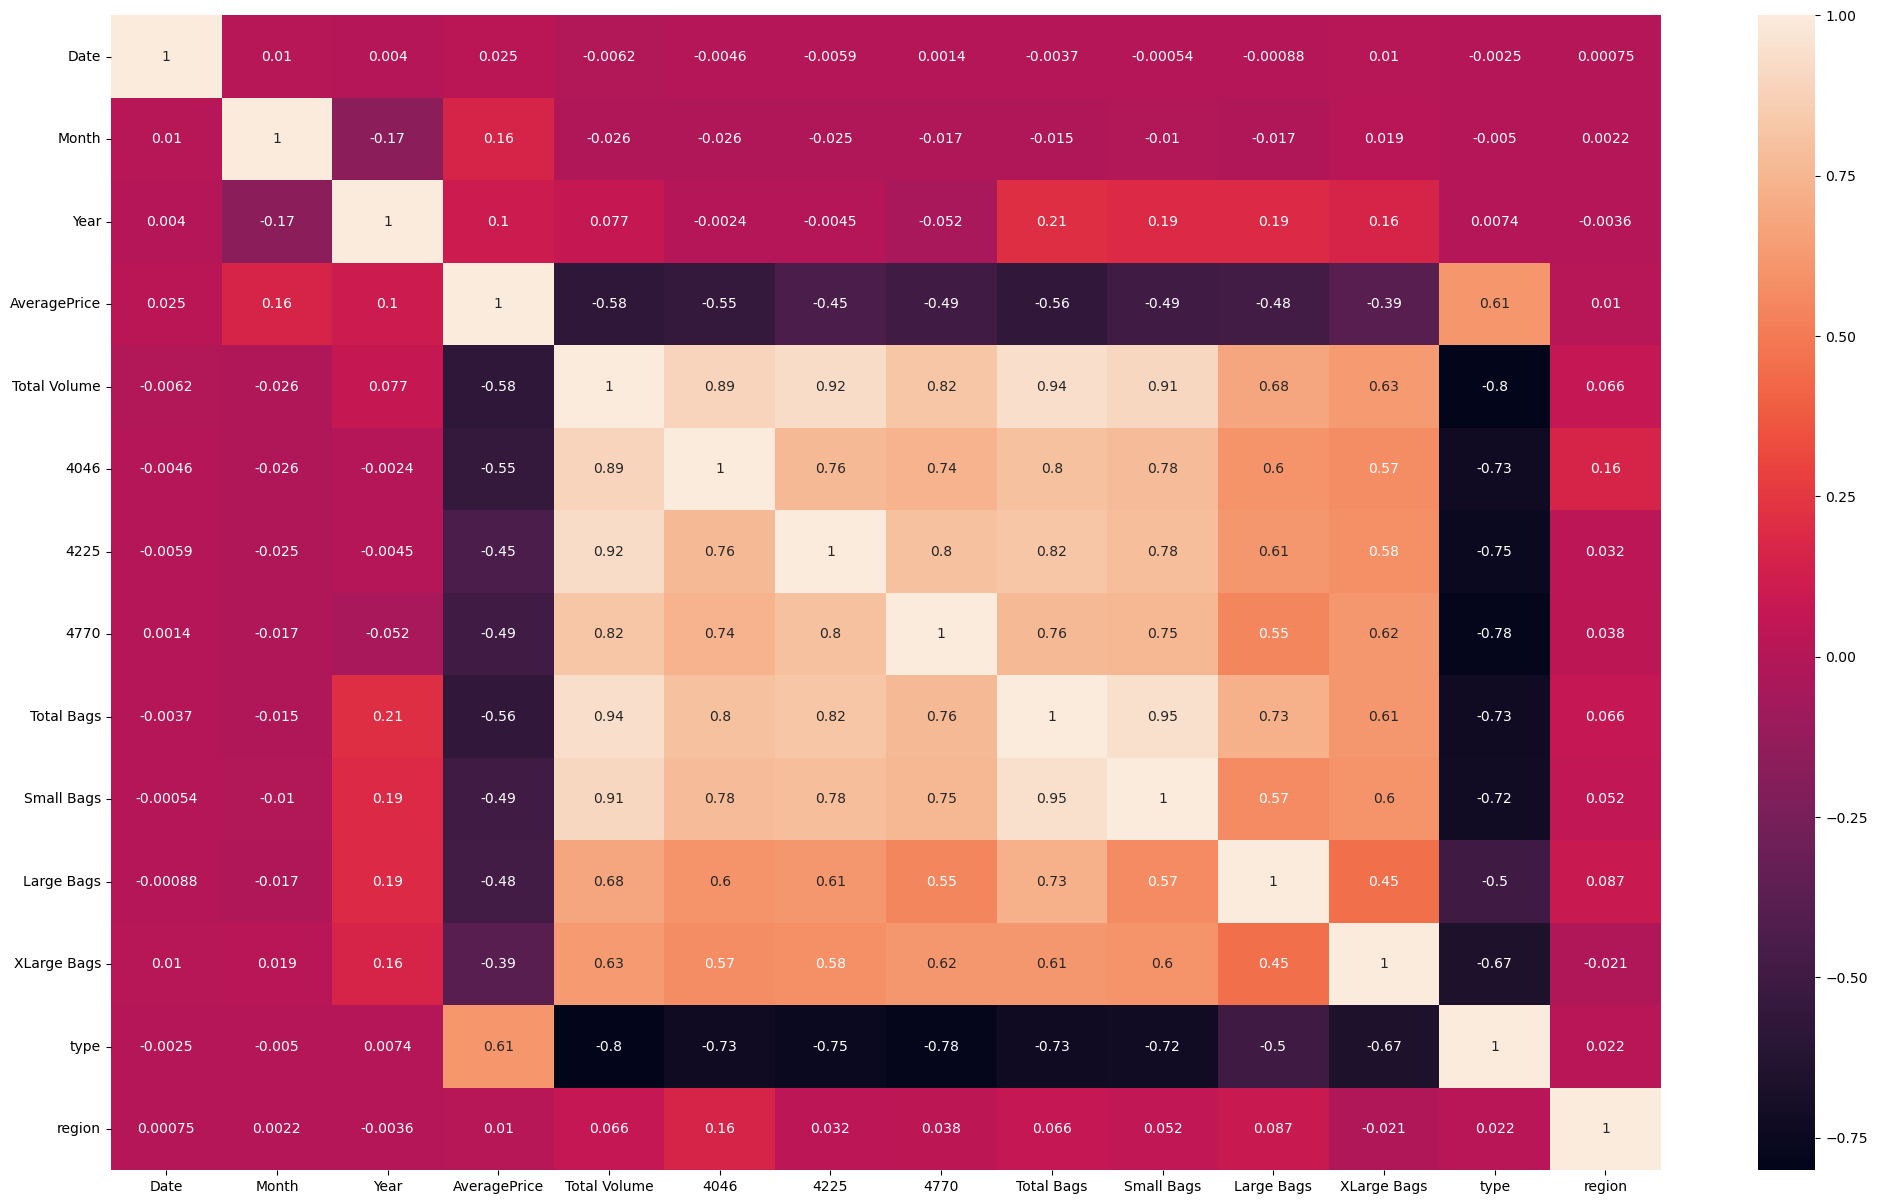

In [38]:
#Checking relationship Between Feature To Outcom And Feature To Feature
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,annot = True , annot_kws ={"size": 10})
plt.show()

Our Features Have MultiCollinearity Issue Total Bags Columne Corelate With Small Bag,Large Bag And Xlarge Bag
And  Total Volume Colume Have Corelation With 4046, 4225 and 4770   These Column Datas Present Total Unit And Bags In Total Volume And Total Bags

In [39]:
#For Regression Model
reg_X  = df.drop(columns = "AveragePrice").copy()
reg_y = df["AveragePrice"].copy()

In [40]:
#Classification Model
cls_X = df.drop(columns = "region").copy()
cls_y = df['region'].copy()

In [41]:
reg_X

,Date,Month,Year,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27,12,2015,11.682360,8.414996,17.961170,3.786332,12.628330,14.920261,5.596791,0.0,0,0
1,20,12,2015,11.507289,7.798521,17.463193,3.963722,12.795590,15.147057,5.662726,0.0,0,0
2,13,12,2015,12.362991,8.032281,19.770957,4.709184,12.505745,14.750415,5.746677,0.0,0,0
3,6,12,2015,11.912638,8.542760,18.674414,4.166196,11.882714,13.892379,6.140037,0.0,0,0
4,29,11,2015,11.426788,8.275612,17.418279,4.206164,11.996342,14.020947,6.749740,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,2,2018,10.217659,9.419831,10.177467,0.000000,13.465493,15.998641,8.037522,0.0,1,53
18245,28,1,2018,9.990983,8.617743,11.737135,0.000000,12.747232,15.017330,7.557327,0.0,1,53
18246,21,1,2018,9.981369,8.618013,11.076110,6.284165,12.773344,15.131771,4.473088,0.0,1,53
18247,14,1,2018,10.160258,8.983023,11.457786,6.283005,13.067236,15.529723,4.702909,0.0,1,53


In [42]:
#Standardizing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
reg_X = pd.DataFrame(scaler.fit_transform(reg_X),columns =reg_X.columns)

In [43]:
#Checking Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Features":reg_X.columns,"vif":[variance_inflation_factor(reg_X,i) for i in range(reg_X.shape[1])]})

In [44]:
vif.sort_values(by = ["vif"])

,Features,vif
0,Date,1.000758
1,Month,1.053901
12,region,1.086166
2,Year,1.386933
10,XLarge Bags,2.053740
9,Large Bags,3.463598
11,type,3.718537
6,4770,3.954879
4,4046,7.156629
5,4225,11.180335


Small Bags, Total Bag and Total Volume  Having MultiColinearity Issue  Its  Very Huge But We Deleting Only Total Columns Total Bag And Total Volumes Beceasue These Two Column Represent Other 3 Column Total Values 

In [45]:
reg_X.drop("Total Volume",axis = 1 , inplace = True)
reg_X.drop("Total Bags",axis = 1,inplace = True)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Features":reg_X.columns,"vif":[variance_inflation_factor(reg_X,i) for i in range(reg_X.shape[1])]})
vif

,Features,vif
0,Date,1.000506
1,Month,1.051207
2,Year,1.359839
3,4046,3.723160
4,4225,4.139977
5,4770,3.940502
6,Small Bags,4.103569
7,Large Bags,1.866024
8,XLarge Bags,2.039339
9,type,3.498746


When We Delet These Two Columns  They Columns Effect Some Other Columns Now Our Data Dont Have MultiColinearity Issue Now Going To Model Building

First We Make  Average Price Prediction Model Using Regression Model Then We Predict Region  Using Classification Algorithms

# Regression Model

In [47]:
#Importing Necessory Liabraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [48]:
#Finding The Best Random State
max_accuracy = 0
best_rm = 0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(reg_X,reg_y, test_size = 30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rm = i
print("Maximum R Square Score :-",max_accuracy,"in This Random State",best_rm)


Maximum R Square Score :- 0.7899964944645759 in This Random State 763


In [63]:
x_train,x_test,y_train,y_test = train_test_split(reg_X,reg_y,test_size = 30,random_state = best_rm)

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred =lr.predict(x_test)
train_pred =lr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,lr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,lr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,lr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,lr_pred)*100))



Training Data- R Square Score 50.91869798421445
R Square Score:- 78.99964944645758
Mean Absolute Error:- 13.11033003519921
Mean Squared Error:- 2.4689972143462784
Root Mean Squared Error:- 1.571304303547304


In [66]:
score = cross_val_score(lr,x_train,y_train,cv = 5, scoring = "r2")
print(score)
print(score.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,lr_pred) - score.mean()))

[0.49990026 0.51773266 0.4915982  0.5209054  0.5103221 ]
50.80917248854369
Difference Between R Square Score And Cross Validation Score Is:- 0.281904769579139


In [67]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn = KNN()
knn.fit(x_train,y_train)
knn_pred =knn.predict(x_test)
train_pred =knn.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,knn_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,knn_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,knn_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,knn_pred)*100))


Training Data- R Square Score 87.38541942119687
R Square Score:- 87.5746509860848
Mean Absolute Error:- 9.286666666666665
Mean Squared Error:- 1.4608399999999997
Root Mean Squared Error:- 1.2086521418505822


In [68]:
score1 = cross_val_score(knn,x_train,y_train,cv = 5, scoring = "r2")
print(score1)
print(score1.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,knn_pred) - score1.mean()))

[0.7918388  0.79814694 0.78388125 0.80404879 0.77830408]
79.1243970884173
Difference Between R Square Score And Cross Validation Score Is:- 0.08450253897667515


In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pred =dtr.predict(x_test)
train_pred =dtr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,dtr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,dtr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,dtr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,dtr_pred)*100))

Training Data- R Square Score 100.0
R Square Score:- 87.77175453916554
Mean Absolute Error:- 8.766666666666662
Mean Squared Error:- 1.437666666666666
Root Mean Squared Error:- 1.19902738361835


In [70]:
score2 = cross_val_score(dtr,x_train,y_train,cv = 5, scoring = "r2")
print(score2)
print(score2.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,dtr_pred) - score2.mean()))

[0.72632728 0.74975093 0.75756269 0.78563478 0.73721986]
75.12991083758126
Difference Between R Square Score And Cross Validation Score Is:- 0.12641843701584277


In [71]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred =rfr.predict(x_test)
train_pred =rfr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,rfr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,rfr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,rfr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,rfr_pred)*100))

Training Data- R Square Score 98.582087171911
R Square Score:- 87.9073040588816
Mean Absolute Error:- 7.555333333333306
Mean Squared Error:- 1.4217301999999952
Root Mean Squared Error:- 1.1923632835675524


In [72]:
score3 = cross_val_score(rfr,x_train,y_train,cv = 5, scoring = "r2")
print(score3)
print(score3.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,rfr_pred) - score3.mean()))

[0.88497019 0.89005317 0.88993074 0.89531097 0.8796553 ]
88.79840738886512
Difference Between R Square Score And Cross Validation Score Is:- -0.008911033299835003


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred =gbr.predict(x_test)
train_pred =gbr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,gbr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,gbr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,gbr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,gbr_pred)*100))

In [ ]:
score4 = cross_val_score(gbr,x_train,y_train,cv = 5, scoring = "r2")
print(score4)
print(score4.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,gbr_pred) - score4.mean()))

In [ ]:
from sklearn.linear_model import Lasso
lso = Lasso()
lso.fit(x_train,y_train)
lso_pred =lso.predict(x_test)
train_pred =lso.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,lso_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,lso_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,lso_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,lso_pred)*100))

In [ ]:
score5 = cross_val_score(lso,x_train,y_train,cv = 5, scoring = "r2")
print(score5)
print(score5.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,lso_pred) - score5.mean()))

In [ ]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(x_train,y_train)
rdg_pred =rdg.predict(x_test)
train_pred =rdg.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,rdg_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,rdg_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,rdg_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,rdg_pred)*100))

In [ ]:
score6 = cross_val_score(rdg,x_train,y_train,cv = 5, scoring = "r2")
print(score6)
print(score6.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,rdg_pred) - score6.mean()))

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_pred =svr.predict(x_test)
train_pred =svr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,svr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,svr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,svr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,svr_pred)*100))

In [ ]:
score7 = cross_val_score(svr,x_train,y_train,cv = 5, scoring = "r2")
print(score7)
print(score7.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,svr_pred) - score7.mean()))

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred =etr.predict(x_test)
train_pred =etr.predict(x_train)
print("Training Data- R Square Score",r2_score(y_train,train_pred)*100)
print("R Square Score:-",r2_score(y_test,etr_pred)*100)
print("Mean Absolute Error:-",mean_absolute_error(y_test,etr_pred)*100)
print("Mean Squared Error:-",mean_squared_error(y_test,etr_pred)*100)
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,etr_pred)*100))

Training Data- R Square Score 100.0
R Square Score:- 94.51905598965719
Mean Absolute Error:- 5.213333333333321
Mean Squared Error:- 0.6443909333333313
Root Mean Squared Error:- 0.802739642308346


In [52]:
score8 = cross_val_score(etr,x_train,y_train,cv = 5, scoring = "r2")
print(score8)
print(score8.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(r2_score(y_test,etr_pred) - score8.mean()))

[0.91415018 0.91680143 0.91165734 0.91780674 0.90962267]
91.40076729598616
Difference Between R Square Score And Cross Validation Score Is:- 0.03118288693671034


Our Best Module is ExtraTreesClassifier

# HyperParameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
param_grid = {'criterion':['absolute_error','squared_error'],
            'n_estimators':[50],
             'max_depth':[None],
             'min_samples_split':[1,2],
             'min_samples_leaf':[1],
             'bootstrap':[True,False]}

In [55]:
grid_search = GridSearchCV(estimator = etr,param_grid =param_grid,scoring ='r2', cv =5)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
best_param = grid_search.best_params_

In [56]:
Regression_Model = ExtraTreesRegressor(criterion = 'squared_error',max_depth = 10,n_estimators = 0,min_samples_split=2,min_samples_leaf =2)
Regression_Model.fit(x_train,y_train)
Reg_pred = Regression_Model.predict(x_test)
R2_Score = r2_score(y_test,Reg_pred)
print(R2_Score*100)


87.73827003058898


In [57]:
import joblib
joblib.dump(Regression_Model,"Avocado Regression Model.pkl")

['Avocado Regression Model.pkl']

# Clasification Model

In [ ]:
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,annot = True , annot_kws ={"size": 10})
plt.show()

In [ ]:
cls_X = pd.DataFrame(scaler.fit_transform(cls_X),columns =cls_X.columns)

In [ ]:
cls_vif= pd.DataFrame({"Features":cls_X.columns,"vif":[variance_inflation_factor(cls_X,i) for i in range(cls_X.shape[1])]})
cls_vif

In [ ]:
cls_X.drop("Total Volume",axis = 1 , inplace = True)
cls_X.drop("Total Bags",axis = 1,inplace = True)

In [ ]:
cls_vif= pd.DataFrame({"Features":cls_X.columns,"vif":[variance_inflation_factor(cls_X,i) for i in range(cls_X.shape[1])]})
cls_vif

In [ ]:
cls_X

In [ ]:
cls_y.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
sm =SMOTE()
cls_X,cls_y = sm.fit_resample(cls_X,cls_y)
cls_y.value_counts()

# Classification Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#Finding The Best Random State
max_accuracy = 0
best_rm = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(cls_X,cls_y, test_size = 30,random_state = i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rm = i
print("Maximum R Square Score :-",max_accuracy,"in This Random State",best_rm)



In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve,classification_report
x_train,x_test,y_train,y_test = train_test_split(cls_X,cls_y, test_size = 30,random_state = best_rm)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
lgr_pred = lgr.predict(x_test)
print(accuracy_score(y_test,lgr_pred))
print(confusion_matrix(y_test,lgr_pred))
print(classification_report(y_test,lgr_pred))

In [ ]:
score = cross_val_score(lgr,x_train,y_train,cv = 5)
print(score)
print(score.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,lgr_pred) - score.mean()))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred =rfc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,rfc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,rfc_pred))
print("Classification Report:-",classification_report(y_test,rfc_pred))


In [ ]:
score1 = cross_val_score(rfc,x_train,y_train,cv = 5)
print(score1)
print(score1.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,rfc_pred) - score1.mean()))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred =etc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,etc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,etc_pred))
print("Classification Report:-",classification_report(y_test,etc_pred))

In [ ]:
score2 = cross_val_score(etc,x_train,y_train,cv = 5)
print(score2)
print(score2.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,etc_pred) - score2.mean()))

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred =svc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,svc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,svc_pred))
print("Classification Report:-",classification_report(y_test,svc_pred))

In [ ]:
score3 = cross_val_score(svc,x_train,y_train,cv = 5)
print(score3)
print(score3.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,svc_pred) - score3.mean()))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,gbc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,gbc_pred))
print("Classification Report:-",classification_report(y_test,gbc_pred))

In [ ]:
score4 = cross_val_score(gbc,x_train,y_train,cv = 5)
print(score4)
print(score4.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,gbc_pred) - score4.mean()))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier()
adbc.fit(x_train,y_train)
adbc_pred =adbc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,adbc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,adbc_pred))
print("Classification Report:-",classification_report(y_test,adbc_pred))

In [ ]:
score5 = cross_val_score(adbc,x_train,y_train,cv = 5)
print(score5)
print(score5.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,adbc_pred) - score5.mean()))

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(x_train,y_train)
bgc_pred =bgc.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,bgc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,bgc_pred))
print("Classification Report:-",classification_report(y_test,bgc_pred))

In [ ]:
score6 = cross_val_score(bgc,x_train,y_train,cv = 5)
print(score6)
print(score6.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,bgc_pred) - score6.mean()))

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred =gnb.predict(x_test)
print("Accuracy Score:-",accuracy_score(y_test,gnb_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,gnb_pred))
print("Classification Report:-",classification_report(y_test,gnb_pred))

In [ ]:
score7 = cross_val_score(gnb,x_train,y_train,cv = 5)
print(score7)
print(score7.mean()*100)
print("Difference Between R Square Score And Cross Validation Score Is:-",(accuracy_score(y_test,lgr_pred) - score7.mean()))

In [ ]:
Best Accuracy  In ExtraTreesClassifier

Our Best Model Is ExtraTreesClassifier

# Hyperparameter Turning

In [ ]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini','entropy'],
             'random_state':list(range(0,1001,500)),
             'max_depth': [None,10],
             'n_jobs':[-1,1],
             'n_estimators':[50,100]}

In [ ]:
gcv = GridSearchCV(ExtraTreesClassifier(),parameters,cv = 5)

In [ ]:
gcv.fit(x_train,y_train)

In [ ]:
gcv.best_params_

In [ ]:
Classification_Model = ExtraTreesClassifier(criterion = 'gini',max_depth = None,n_estimators = 100,n_jobs = -1,random_state = 1)
Classification_Model.fit(x_train,y_train)
cls_pred = Classification_Model.predict(x_test)
acc = accuracy_score(y_test,cls_pred)
print(acc*100)


In [ ]:
import joblib
joblib.dump(Classification_Model,"Avocado Classification Model.pkl")